# Theories of the Hadley circulation

## Motivation

So far we've seen that the atmospheric circulation in the low latitudes is dominated by the zonally-symmetric overturning, while away from the equator the eddies tend to dominate.

We've seen that there is a seamless transport of energy from the equator to the poles, despite the fact that the dominant transport mechanism changes from the MMC in the tropics to transient eddies in mid-latitudes.

Some questions we'd like to get physical insight into:

- What determines the strength of the Hadley circulation?
- What determines the meridional extend of the Hadley circulation?
- Can the Hadley circulation exist in the absence of eddies?
- What roles are played by differential heating and eddies in the maintenance of the Hadley circulation?

To start to answer these questions, we follow the classic paper by Held and Hou {cite}`Held:1980hu`.

See also Lindzen's book, Vallis, etc.

## Assumptions and governing equations

We will make the following assumptions

- We can model the troposphere as a Boussinesq system of depth $H$ (where $H$ is the tropopause height) on a sphere
- The flow is *steady in time*
- The flow is *zonally symmetric*, i.e. it has no variations in longitude
- Turbulence and frictional effects can be modeled by a vertical down-gradient diffusion
- Diabatic heating can be modeled by a Newtonian relaxation to a reference profile with a constant timescale $\tau$

### Governing equations

We'll define the zonally symmetric overturning circulation vector

$$ \vec{v} = (v,w) $$

And write the governing set of equations like this:

\begin{align*}
\text{Momentum:} & & \nabla\cdot (\vec{v} u) - \left( f + \frac{u \tan\phi}{a} \right) v &= \frac{\partial}{\partial z} \left( \nu \frac{\partial u}{\partial z} \right) \\
& & (\vec{v} v) + \left( f + \frac{u \tan\phi}{a} \right) u &= -\frac{1}{a}\frac{\partial \Phi}{\partial \phi} + \frac{\partial}{\partial z} \left( \nu \frac{\partial v}{\partial z} \right) \\
\text{Continuity} & & \nabla \cdot \vec{v} &= 0 \\
\text{Thermodynamic} & & \nabla \cdot ( \vec{v} \theta ) &= \frac{\partial}{\partial z} \left( \nu \frac{\partial \theta}{\partial z} \right) - \frac{(\theta-\theta_{eq})}{\tau} \\
\text{Hydrostatic} & & \frac{\partial \Phi}{\partial z} &= g \frac{\theta}{\theta_0} 
\end{align*}

Here recall that the Boussinesq pressure is

$$\Phi = \frac{p}{\rho_0} $$

and $\theta_0, \rho_0$ are reference values.

An appropriate radiative relaxation timescale for the troposphere is $\tau \approx 30$ days.

### The radiative-convective equilibrium temperature profile

Following {cite:t}`Held:1980hu`, we define our equilibrium temperature like this

$$ \theta_{eq} = \theta_0 \left[ 1 - \Delta_H \sin^2\phi + \Delta_V \left( \frac{z}{H} - \frac{1}{2} \right) \right] $$

where we take

- $\theta_0 = 400$ K as a reference potential temperature
- $\Delta_H = 0.3$ is the fractional potential temperature drop from equator to pole in radiative-convective equilibrium
- $\Delta_V = 0.3$ is the fractional potential temperature drop from $z=H$ to the surface in radiative-convective equilibrium

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [5]:
theta0 = 400.
DeltaH = 0.3
DeltaV = 0.3
H = 10.  # tropopause height in km -- for illustration purposes

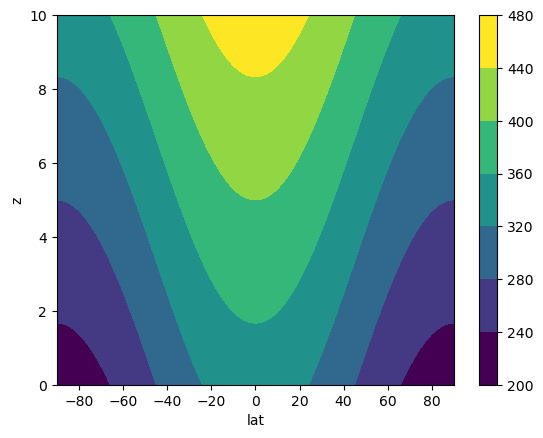

In [12]:
latarray = np.linspace(-90,90,181)
lat = xr.DataArray(latarray, coords={'lat': latarray})
phi = np.deg2rad(lat)

zarray = np.linspace(0,H)
z = xr.DataArray(zarray, coords={'z': zarray})

theta_eq = theta0*(1-DeltaH*np.sin(phi)**2 + DeltaV*(z/H-1/2))
theta_eq.plot.contourf(x='lat')

### Boundary conditions

At the tropopause $z=H$ we apply *no-flow* and *free-slip* conditions:

\begin{align*}
w(H) &= 0 \\
\frac{\partial \theta}{\partial z}\Big|_{z=H} &= 0 \\
\frac{\partial u}{\partial z}\Big|_{z=H} & = 0 \\
\frac{\partial v}{\partial z}\Big|_{z=H} & = 0 
\end{align*}

At the surface, we apply *no-flow* and a simple Rayleigh drag condition:

\begin{align*}
w(0) &= 0 \\
\frac{\partial \theta}{\partial z}\Big|_{z=0} &= 0 \\
\nu\frac{\partial u}{\partial z}\Big|_{z=0} & = c u \\
\nu\frac{\partial v}{\partial z}\Big|_{z=0} & = c v 
\end{align*}

Finally, we impose *interhemispheric symmetry* -- no cross-equatorial flow:

$$ v = 0  $$

at $\phi = 0$.

## Frictional solution: pure radiative-convective equilibrium

First, let's look at the case of a purely frictionless / non-turbulent flow where

$$\nu = 0$$

A solution to the governing equations exists for which the flow is purely zonal with no overturning:

\begin{align*}
u &= u_{eq} \\
v &= 0 \\
w &= 0
\end{align*}

In such a case, the thermodynamic equation tells us that 

$$ \theta = \theta_{eq} $$

everywhere, i.e. the atmosphere is in a state of radiative-convective equilibrium.

### Solving for the zonal wind profile

We would like to see what this model predicts for the vertical and meridional profile of the zonal wind $u_{eq}$ in the radiative-convective equilibrium state.

The meridional momentum equation becomes

$$ f u_{eq} + \frac{u_{eq}^2 \tan\phi}{a} = -\frac{1}{a} \frac{\partial \Phi}{\partial \phi} $$

Deriving a thermal wind equation by taking the vertical derivative and using hydrostatic balance:

$$\frac{\partial}{\partial z} \left( f u_{eq} + \frac{u_{eq}^2 \tan\phi}{a} \right) = -\frac{g}{a \theta_0} \frac{\partial \theta_{eq}}{\partial \phi}$$

From the definition of $\theta_{eq}$ we get

$$\frac{\partial \theta_{eq}}{\partial \phi} = -2\Delta_H \theta_0 \sin\phi \cos\phi $$

So, integrating the thermal wind equation in the vertical and applying the boundary condition $u_{eq}(0) = 0$, we get

$$f u_{eq} + \frac{u_{eq}^2 \tan\phi}{a} = \frac{2 g \Delta_H}{a} \sin\phi \cos\phi z$$

which is a quadratic equation in $u_{eq}$ that we can solve:

$$u_{eq} = \Omega a \cos\phi \left( \sqrt{1 + \frac{2 z}{H} \left(\frac{g H \Delta_H}{(\Omega a)^2}\right)} - 1 \right)$$

... more to come

### Profile of absolute angular momentum

$$M_eq = \Omega a^2 \cos^2\phi \sqrt{1 + \frac{2z}{H} R_{OT}}$$

In [14]:
sidereal_day = 86164.0905  # in seconds -- we definitely don't need this accuracy but hey
a = 6.373E6      # Radius of Earth (m)
Omega = 2*np.pi / sidereal_day
uT = 100. # tropopause-level wind speed in m/s -- order of magnitude estimate

# The temporal Rossby number
RoT = uT / Omega / a
RoT

0.2151803062936203

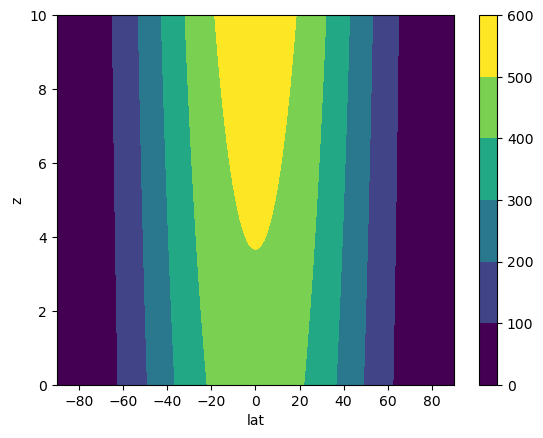

In [17]:
Meq = Omega*a*np.cos(phi)**2 * np.sqrt(1+2*z/H*RoT)
Meq.plot.contourf(x='lat')

The key point here is the existence of a local maximum of absolute angular momentum away from the surface, which cannot exist in a fluid with any viscosity at all.